## BHT+VTS+IB experiment
Pilot analyses

In [31]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import random
import glob

# Settings
# plt.style.use('seaborn-dark') 
plt.style.use('seaborn-whitegrid') 
plt.style.use('seaborn-deep') # https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

pd.set_option('display.float_format', lambda x: f'{x:.5f}'.rstrip('0').rstrip('.')) # disable scientific notation & set decimal point & strip 0's


## Load data

VTS data

In [14]:
# Folder path where CSV files are located
folder_path = 'C:/Users/barto/Psych/Badania/PdB Exp2 IB/Data analysis/Pilot1/data'

# Find CSV files containing '_vts' in their names
csv_files = glob.glob(folder_path + '/*_vts.csv')

# Read all CSV files into a single DataFrame
dfs = []
for file in csv_files:
    df = pd.read_csv(file, delimiter=';')
    dfs.append(df)

# Concatenate all DataFrames into one
d1 = pd.concat(dfs, ignore_index=True)

Explicit data

In [7]:
# Find CSV files 
csv_files = glob.glob(folder_path + '/*_explicit.csv')

# Read all CSV files into a single DataFrame
dfs = []
for file in csv_files:
    df = pd.read_csv(file, delimiter=';')
    dfs.append(df)

# Concatenate all DataFrames into one
e1 = pd.concat(dfs, ignore_index=True)

## Wrangle 

In [32]:
d2 = d1.copy()
d2.rename(columns={'participant':'id', 'task_sel':'task'}, inplace=True)
d2.drop(columns=['date','exp_name'], inplace=True)
d2[['frame_rate','rt','fb_delay','ib_rt']] = d2[['frame_rate','rt','fb_delay','ib_rt']].round(2)
d2

,id,condition,cb,frame_rate,training_vts,enable_ib,trial_nr,block_nr,stim,action,...,response,correct_resp,correct,task,rt,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start
0,1010,0,1,59.99,1,0,0,1,circle_right,9,...,?,NaN,9,-1,-1,0.6,0,-1,-1,-1
1,1010,0,1,59.99,1,0,1,1,square_right,1,...,k,k,1,2,2.69,0.6,1,-1,-1,-1
2,1010,0,1,59.99,1,0,2,1,square_middle,1,...,k,k,1,2,2.26,0.3,2,-1,-1,-1
3,1010,0,1,59.99,1,0,3,1,square_middle,1,...,d,d,1,1,1.64,0.9,3,-1,-1,-1
4,1010,0,1,59.99,1,0,4,1,triangle_right,1,...,ralt,ralt,1,2,1.62,0.9,4,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1012,0,1,59.99,0,1,67,3,square_right,1,...,lalt,lalt,1,1,1.75,0.6,67,6,0.66,6
716,1012,0,1,59.99,0,1,68,3,triangle_left,1,...,w,w,1,1,1.74,0.9,68,6,0.54,6
717,1012,0,1,59.99,0,1,69,3,triangle_middle,1,...,d,d,1,1,1.72,0.3,69,2,0.24,2
718,1012,0,1,59.99,0,1,70,3,square_left,1,...,lalt,w,0,1,2.15,0.6,70,5,0.34,5


In [54]:
(d2.groupby('condition')['rt','correct']
 .describe())

# d1


C:\Users\barto\AppData\Local\Temp\ipykernel_4172\1604508634.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (d2.groupby('condition')['rt','correct']


rt                                          correct          \
          count    mean     std min  25%  50%   75%  max   count    mean   
condition                                                                  
0           480 1.84556 0.79505  -1 1.74 1.88  2.17 4.15     480 0.89792   
1           240 1.87779 0.44789 0.4 1.71 1.78 2.025 3.93     240 0.74583   

                                       
              std min 25% 50% 75% max  
condition                              
0         1.52228  -1   1   1   1   9  
1         0.61193  -1   1   1   1   1

In [35]:
d2.value_counts(['task', 'action'])
d2.value_counts('action', normalize=True)

d2.groupby('id')['action'].value_counts(normalize=True)

id    action
1010  1        0.97917
      8        0.01667
      9        0.00417
1011  1        0.90833
      8        0.09167
1012  1        0.69583
      8        0.25417
      9           0.05
Name: action, dtype: float64

In [56]:
# Filter out premature/late responses
d3 = d2[~d2['action'].isin([8, 9])]
d3.value_counts('task', normalize=True)

# Get swtiches (compare task between consecutive rows)
d3['switch'] = (d3['task'] != d3['task'].shift(1)).astype(int)
d3



C:\Users\barto\AppData\Local\Temp\ipykernel_4172\2068871565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['switch'] = (d3['task'] != d3['task'].shift(1)).astype(int)


,id,condition,cb,frame_rate,training_vts,enable_ib,trial_nr,block_nr,stim,action,...,correct_resp,correct,task,rt,fb_delay,fb_delay_index,ib_estimation,ib_rt,ib_start,switch
1,1010,0,1,59.99,1,0,1,1,square_right,1,...,k,1,2,2.69,0.6,1,-1,-1,-1,1
2,1010,0,1,59.99,1,0,2,1,square_middle,1,...,k,1,2,2.26,0.3,2,-1,-1,-1,0
3,1010,0,1,59.99,1,0,3,1,square_middle,1,...,d,1,1,1.64,0.9,3,-1,-1,-1,1
4,1010,0,1,59.99,1,0,4,1,triangle_right,1,...,ralt,1,2,1.62,0.9,4,-1,-1,-1,1
5,1010,0,1,59.99,1,0,5,1,triangle_middle,1,...,d,1,1,2.59,0.6,5,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1012,0,1,59.99,0,1,67,3,square_right,1,...,lalt,1,1,1.75,0.6,67,6,0.66,6,0
716,1012,0,1,59.99,0,1,68,3,triangle_left,1,...,w,1,1,1.74,0.9,68,6,0.54,6,0
717,1012,0,1,59.99,0,1,69,3,triangle_middle,1,...,d,1,1,1.72,0.3,69,2,0.24,2,0
718,1012,0,1,59.99,0,1,70,3,square_left,1,...,w,0,1,2.15,0.6,70,5,0.34,5,0


## EDA

VSR

In [46]:
d3.groupby('condition')['switch'].value_counts(normalize=True)

condition  switch
0          0        0.75124
           1        0.24876
1          0         0.7156
           1         0.2844
Name: switch, dtype: float64

RT

In [47]:
# Calculate mean and standard deviation for a numeric variable
d3.groupby('condition')['rt'].agg(['mean', 'std'])

,mean,std
condition,,
0,2.11408,0.4543
1,1.95358,0.38159


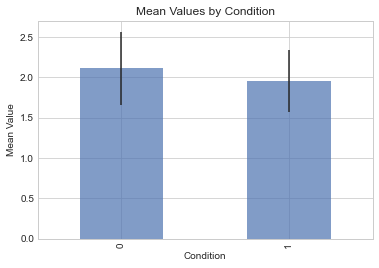

In [53]:
result = d3.groupby('condition')['rt'].agg(['mean', 'std'])

result['mean'].plot(kind='bar', yerr=result['std'], alpha=0.7)

# Adding labels and title
plt.xlabel('Condition')
plt.ylabel('Mean Value')
plt.title('Mean Values by Condition')

# Show plot
plt.show()

Accuracy

In [57]:
# Calculate proportions for a categorical variable ('correct')
d3.groupby('condition')['correct'].value_counts(normalize=True)

condition  correct
0          1         0.94279
           0         0.05721
1          1         0.92202
           0         0.07798
Name: correct, dtype: float64